In [ ]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
img = cv2.imread('/content/Mark.jpg')
img.shape

(408, 612, 3)

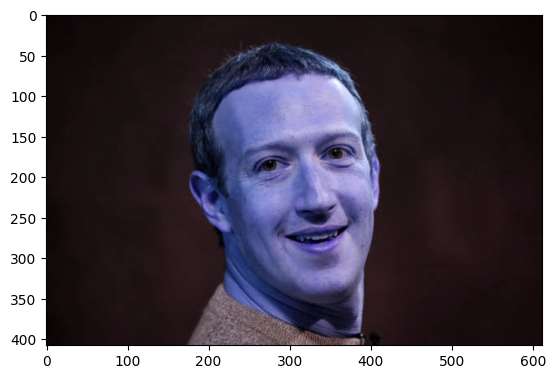

In [ ]:
plt.imshow(img)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(408, 612)

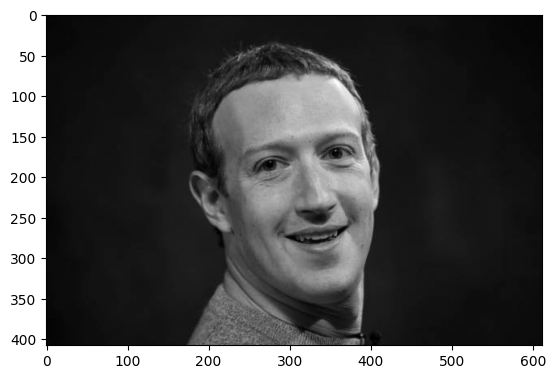

In [ ]:
plt.imshow(gray, cmap='gray')

In [ ]:
import cv2

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')


In [ ]:
print(face_cascade.empty())

False


In [ ]:
img = cv2.imread('/content/Mark.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Load and convert image
img = cv2.imread('/content/Mark.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
print(faces)

[[191  77 259 259]]


In [ ]:
import cv2

# ✅ Correct way to load cascades using OpenCV's built-in path
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade  = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# 🔍 Check that cascades loaded properly
print("Face Cascade Loaded:", not face_cascade.empty())
print("Eye Cascade Loaded:", not eye_cascade.empty())

# ✅ Load image
img = cv2.imread('/content/Mark.jpg')  # Replace with your real image filename
if img is None:
    raise Exception("Image not found. Check the filename and path.")

# ✅ Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ✅ Face detection
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
print(f"Detected {len(faces)} face(s):", faces)

Face Cascade Loaded: True
Eye Cascade Loaded: True
Detected 1 face(s): [[191  77 259 259]]


In [ ]:
(x,y,w,h) = faces[0]
x,y,w,h

(np.int32(191), np.int32(77), np.int32(259), np.int32(259))

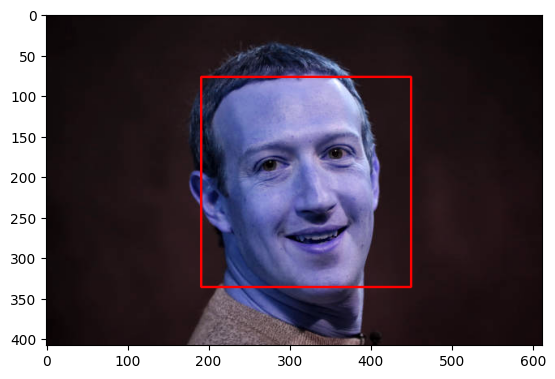

In [ ]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

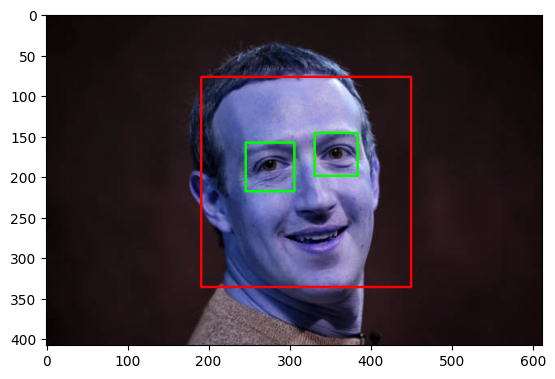

In [ ]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

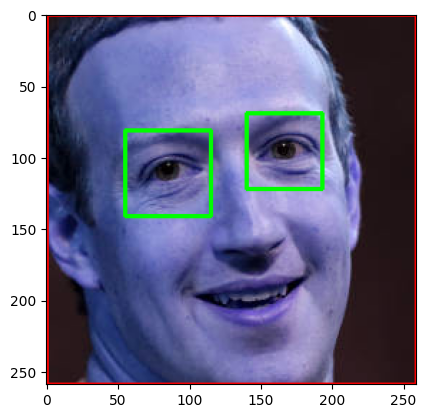

In [ ]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [ ]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

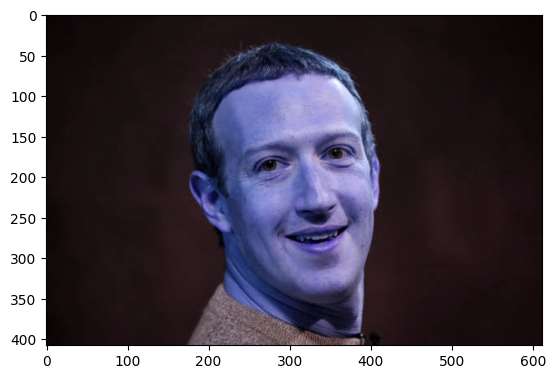

In [ ]:
original_image = cv2.imread('/content/Mark.jpg')
plt.imshow(original_image)

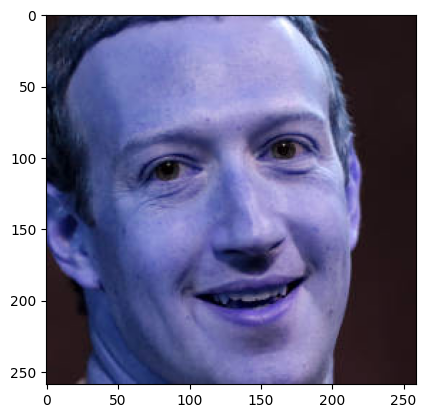

In [ ]:
cropped_image = get_cropped_image_if_2_eyes('/content/Mark.jpg')
plt.imshow(cropped_image)

array([[[35, 22, 24],
        [34, 20, 24],
        [36, 22, 26],
        ...,
        [30, 17, 19],
        [30, 17, 19],
        [30, 17, 19]],

       [[36, 23, 25],
        [36, 22, 26],
        [37, 23, 27],
        ...,
        [30, 17, 19],
        [30, 17, 19],
        [30, 17, 19]],

       [[37, 24, 26],
        [37, 23, 27],
        [38, 24, 28],
        ...,
        [30, 17, 19],
        [30, 17, 19],
        [30, 17, 19]],

       ...,

       [[42, 25, 28],
        [41, 24, 27],
        [41, 24, 27],
        ...,
        [37, 20, 23],
        [36, 19, 22],
        [36, 19, 22]],

       [[42, 25, 28],
        [41, 24, 27],
        [41, 24, 27],
        ...,
        [37, 20, 23],
        [36, 19, 22],
        [36, 19, 22]],

       [[42, 25, 28],
        [41, 24, 27],
        [41, 24, 27],
        ...,
        [37, 20, 23],
        [36, 19, 22],
        [36, 19, 22]]], dtype=uint8)
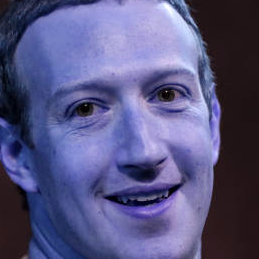

In [ ]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('/content/Mark.jpg')
cropped_image_no_2_eyes

In [ ]:
path_to_data = "/content/Datasets"
path_to_cr_data = "/content/Datasets/Cropped"

In [ ]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [ ]:
img_dirs

['/content/Datasets/CroppedTom cruise',
 '/content/Datasets/.ipynb_checkpoints',
 '/content/Datasets/Cristiano Ronaldo',
 '/content/Datasets/Tom cruise',
 '/content/Datasets/Virat Kohli',
 '/content/Datasets/Mark Zuckerberg',
 '/content/Datasets/CroppedVirat Kohli',
 '/content/Datasets/CroppedCristiano Ronaldo',
 '/content/Datasets/Cropped',
 '/content/Datasets/Sania Mirza']

In [ ]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [ ]:
import os

valid_extensions = ('.jpg', '.jpeg', '.png')  # Only allow valid image formats

cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = os.path.basename(img_dir)
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        if entry.is_file() and entry.name.lower().endswith(valid_extensions):
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            if roi_color is not None:
                cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder:", cropped_folder)

                cropped_file_name = f"{celebrity_name}_{count}.png"
                cropped_file_path = os.path.join(cropped_folder, cropped_file_name)

                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1
        else:
            print(f"Skipped non-image or unsupported file: {entry.path}")

def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"⚠️ Could not load image: {image_path}")
        return None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

    return None


CroppedTom cruise
Generating cropped images in folder: /content/Datasets/Cropped/CroppedTom cruise
.ipynb_checkpoints
Cristiano Ronaldo
Generating cropped images in folder: /content/Datasets/Cropped/Cristiano Ronaldo
Tom cruise
Generating cropped images in folder: /content/Datasets/Cropped/Tom cruise
Virat Kohli
Generating cropped images in folder: /content/Datasets/Cropped/Virat Kohli
Skipped non-image or unsupported file: /content/Datasets/Virat Kohli/1678836965_57c7769197215ff88fbbb4b52c34856d.gif
Mark Zuckerberg
Generating cropped images in folder: /content/Datasets/Cropped/Mark Zuckerberg
CroppedVirat Kohli
Generating cropped images in folder: /content/Datasets/Cropped/CroppedVirat Kohli
CroppedCristiano Ronaldo
Generating cropped images in folder: /content/Datasets/Cropped/CroppedCristiano Ronaldo
Cropped
Skipped non-image or unsupported file: /content/Datasets/Cropped/CroppedTom cruise
Skipped non-image or unsupported file: /content/Datasets/Cropped/Cristiano Ronaldo
Skipped non

In [ ]:
import os
import cv2

# List of valid image extensions
valid_extensions = ('.jpg', '.jpeg', '.png')

cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = os.path.basename(img_dir)  # more robust than split('/')
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        if entry.is_file() and entry.name.lower().endswith(valid_extensions):
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            if roi_color is not None:
                cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder:", cropped_folder)

                cropped_file_name = f"{celebrity_name}_{count}.png"
                cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1
        else:
            print(f"Skipped non-image or unsupported file: {entry.path}")

CroppedTom cruise
.ipynb_checkpoints
Cristiano Ronaldo
Tom cruise
Virat Kohli
Skipped non-image or unsupported file: /content/Datasets/Virat Kohli/1678836965_57c7769197215ff88fbbb4b52c34856d.gif
Mark Zuckerberg
CroppedVirat Kohli
CroppedCristiano Ronaldo
Cropped
Skipped non-image or unsupported file: /content/Datasets/Cropped/CroppedTom cruise
Skipped non-image or unsupported file: /content/Datasets/Cropped/Cristiano Ronaldo
Skipped non-image or unsupported file: /content/Datasets/Cropped/Tom cruise
Skipped non-image or unsupported file: /content/Datasets/Cropped/Virat Kohli
Skipped non-image or unsupported file: /content/Datasets/Cropped/Mark Zuckerberg
Skipped non-image or unsupported file: /content/Datasets/Cropped/CroppedVirat Kohli
Skipped non-image or unsupported file: /content/Datasets/Cropped/CroppedCristiano Ronaldo
Skipped non-image or unsupported file: /content/Datasets/Cropped/Sania Mirza
Sania Mirza
Skipped non-image or unsupported file: /content/Datasets/Sania Mirza/16769

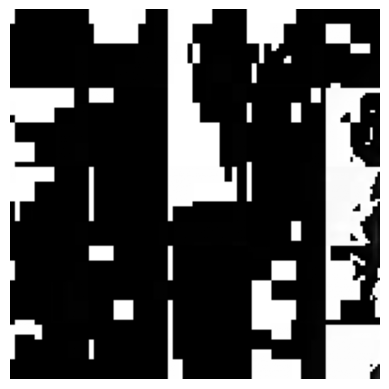

In [ ]:
import numpy as np
import pywt
import cv2
import matplotlib.pyplot as plt

def w2d(img, mode='haar', level=1):
    # Convert to grayscale
    imArray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Convert to float and normalize
    imArray = np.float32(imArray)
    imArray /= 255.0
    # Compute wavelet coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    # Zero out approximation coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0
    # Reconstruct image from detail coefficients only
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    return imArray_H

# Read image
image = cv2.imread('/content/Mark.jpg')  # Replace with your image path
if image is None:
    raise ValueError("Image not found or path is incorrect")

# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Crop image - adjust the crop coordinates as needed
cropped_image = image[50:200, 30:180]  # Example crop, slice in [y1:y2, x1:x2]

# Apply wavelet transform
im_har = w2d(cropped_image, mode='db1', level=5)

# Display
plt.imshow(im_har, cmap='gray')
plt.axis('off')
plt.show()

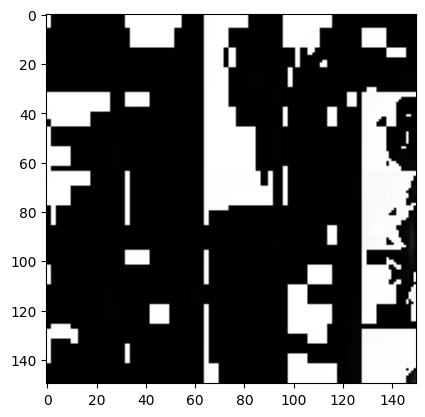

In [ ]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [ ]:
import os

cropped_image_dirs = []
celebrity_file_names_dict = {}
valid_extensions = ('.jpg', '.jpeg', '.png')

for img_dir in img_dirs:
    count = 1
    celebrity_name = os.path.basename(img_dir)
    celebrity_file_names_dict[celebrity_name] = []

    print("Processing directory:", img_dir)

    for entry in os.scandir(img_dir):
        if not entry.is_file():
            continue
        if entry.name.startswith('.'):
            continue
        if not entry.name.lower().endswith(valid_extensions):
            continue

        print("Checking:", entry.path)

        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
            print("Generating cropped images in folder:", cropped_folder)

            cropped_file_name = f"{celebrity_name}{count}.png"
            cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1
        else:
            print("No face/2-eyes found in:", entry.path)

Processing directory: /content/Datasets/CroppedTom cruise
Checking: /content/Datasets/CroppedTom cruise/Tom cruise11.png
No face/2-eyes found in: /content/Datasets/CroppedTom cruise/Tom cruise11.png
Checking: /content/Datasets/CroppedTom cruise/Tom cruise12.png
Generating cropped images in folder: /content/Datasets/Cropped/CroppedTom cruise
Checking: /content/Datasets/CroppedTom cruise/Tom cruise15.png
Generating cropped images in folder: /content/Datasets/Cropped/CroppedTom cruise
Checking: /content/Datasets/CroppedTom cruise/Tom cruise1.png
No face/2-eyes found in: /content/Datasets/CroppedTom cruise/Tom cruise1.png
Checking: /content/Datasets/CroppedTom cruise/Tom cruise24.png
Generating cropped images in folder: /content/Datasets/Cropped/CroppedTom cruise
Checking: /content/Datasets/CroppedTom cruise/Tom cruise19.png
No face/2-eyes found in: /content/Datasets/CroppedTom cruise/Tom cruise19.png
Checking: /content/Datasets/CroppedTom cruise/Tom cruise22.png
Generating cropped images 

In [ ]:
import os

cropped_dir = "/content/Datasets/Cropped"  # adjust path if different
cropped_image_dirs = []

for entry in os.scandir(cropped_dir):
    if entry.is_dir():
        cropped_image_dirs.append(entry.path)

print("Found dirs:", cropped_image_dirs)

Found dirs: ['/content/Datasets/Cropped/CroppedTom cruise', '/content/Datasets/Cropped/Cristiano Ronaldo', '/content/Datasets/Cropped/Tom cruise', '/content/Datasets/Cropped/Virat Kohli', '/content/Datasets/Cropped/Mark Zuckerberg', '/content/Datasets/Cropped/CroppedVirat Kohli', '/content/Datasets/Cropped/CroppedCristiano Ronaldo', '/content/Datasets/Cropped/Sania Mirza']


In [ ]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'CroppedTom cruise': ['/content/Datasets/Cropped/CroppedTom cruise/CroppedTom cruise_4.png',
  '/content/Datasets/Cropped/CroppedTom cruise/CroppedTom cruise_3.png',
  '/content/Datasets/Cropped/CroppedTom cruise/CroppedTom cruise8.png',
  '/content/Datasets/Cropped/CroppedTom cruise/CroppedTom cruise_11.png',
  '/content/Datasets/Cropped/CroppedTom cruise/CroppedTom cruise7.png',
  '/content/Datasets/Cropped/CroppedTom cruise/CroppedTom cruise_6.png',
  '/content/Datasets/Cropped/CroppedTom cruise/CroppedTom cruise10.png',
  '/content/Datasets/Cropped/CroppedTom cruise/CroppedTom cruise11.png',
  '/content/Datasets/Cropped/CroppedTom cruise/CroppedTom cruise2.png',
  '/content/Datasets/Cropped/CroppedTom cruise/CroppedTom cruise_2.png',
  '/content/Datasets/Cropped/CroppedTom cruise/CroppedTom cruise13.png',
  '/content/Datasets/Cropped/CroppedTom cruise/CroppedTom cruise3.png',
  '/content/Datasets/Cropped/CroppedTom cruise/CroppedTom cruise12.png',
  '/content/Datasets/Cropped/Crop

In [ ]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'CroppedTom cruise': 0,
 'Cristiano Ronaldo': 1,
 'Tom cruise': 2,
 'Virat Kohli': 3,
 'Mark Zuckerberg': 4,
 'CroppedVirat Kohli': 5,
 'CroppedCristiano Ronaldo': 6,
 'Sania Mirza': 7}

In [ ]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
          continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [ ]:
import numpy as np
import cv2

IMG_SIZE = 64  # for example, can be 64x64

def image_to_feature_vector(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return None
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize to standard size
    return img.flatten()  # Converts (64, 64, 3) → (12288,)  [64x64x3]

# Prepare feature data
X = []
y = []

for celebrity_name, file_list in celebrity_file_names_dict.items():
    for file_path in file_list:
        feature = image_to_feature_vector(file_path)
        if feature is not None:
            X.append(feature)
            y.append(celebrity_name)

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)  # Should be (n_samples, 12288)


X shape: (338, 12288)


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
celebrity_name = img_path.split('/')[-2].replace("Cropped", "").strip()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9529411764705882

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

                          precision    recall  f1-score   support

       Cristiano Ronaldo       1.00      0.89      0.94        18
CroppedCristiano Ronaldo       0.82      1.00      0.90         9
       CroppedTom cruise       1.00      0.75      0.86         8
      CroppedVirat Kohli       1.00      1.00      1.00         3
         Mark Zuckerberg       1.00      1.00      1.00        22
             Sania Mirza       1.00      1.00      1.00         4
              Tom cruise       0.83      1.00      0.91        10
             Virat Kohli       1.00      1.00      1.00        11

                accuracy                           0.95        85
               macro avg       0.96      0.95      0.95        85
            weighted avg       0.96      0.95      0.95        85



In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression': {
    'model': LogisticRegression(solver='liblinear'),
    'params': {
        'logisticregression__C': [1, 5, 10]
    }
}

        }

In [ ]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.897255,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.842353,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.901490,{'logisticregression__C': 1}


In [ ]:
best_estimators['svm'].score(X_test,y_test)

0.9529411764705882

In [ ]:
best_estimators['random_forest'].score(X_test,y_test)

0.9058823529411765

In [ ]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9294117647058824

In [ ]:
best_clf = best_estimators['svm']

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[16,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  6,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 22,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 10,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 11]])

Text(95.72222222222221, 0.5, 'Truth')

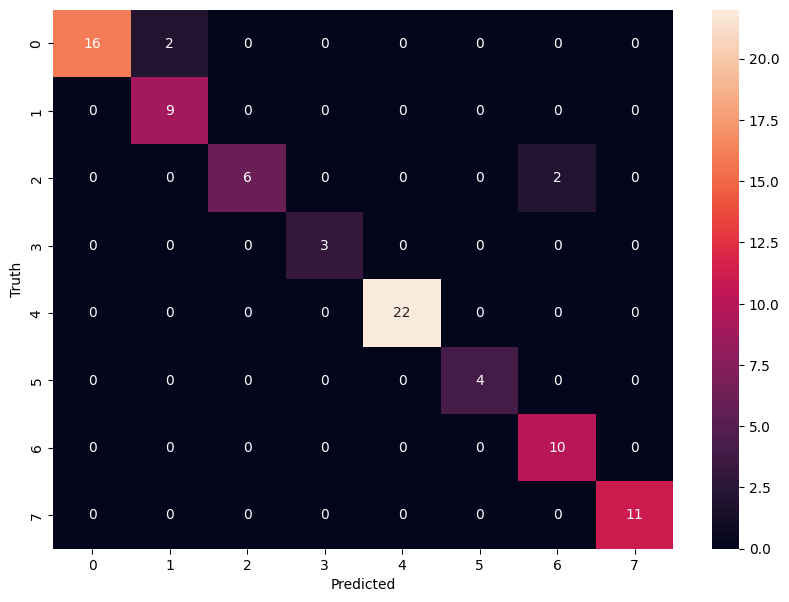

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
class_dict

{'CroppedTom cruise': 0,
 'Cristiano Ronaldo': 1,
 'Tom cruise': 2,
 'Virat Kohli': 3,
 'Mark Zuckerberg': 4,
 'CroppedVirat Kohli': 5,
 'CroppedCristiano Ronaldo': 6,
 'Sania Mirza': 7}

In [ ]:
!pip install joblib
import joblib
# Save the model as a pickle in a file
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [ ]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [ ]:
import os
import cv2
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler

# Path to cropped images
cropped_path = "Datasets/Cropped"  # Adjust path if needed

X = []
y = []

# Loop through each celebrity folder
for celeb_name in os.listdir(cropped_path):
    celeb_folder = os.path.join(cropped_path, celeb_name)
    if not os.path.isdir(celeb_folder):
        continue
    for img_name in os.listdir(celeb_folder):
        img_path = os.path.join(celeb_folder, img_name)
        img = cv2.imread(img_path)
        if img is None:
            continue
        resized = cv2.resize(img, (64, 64))
        X.append(resized.flatten())
        y.append(celeb_name)

X = np.array(X)
y = np.array(y)

print(f"Feature shape before scaling: {X.shape}")

# Fit and save the scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

joblib.dump(scaler, "scaler.pkl")
print("✅ scaler.pkl saved successfully.")

Feature shape before scaling: (338, 12288)
✅ scaler.pkl saved successfully.
